In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [6]:
fraud = pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [7]:
fraud.rename(columns = {'Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience','Marital.Status':'Marital_Status'},inplace = True)
fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
fraud1 = pd.get_dummies(fraud,columns=['Undergrad','Marital_Status','Urban'])
fraud1

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [9]:
fraud1["income"]="<=30000"
fraud1.loc[fraud1["Taxable_Income"]>=30000,"income"]="Good"
fraud1.loc[fraud1["Taxable_Income"]<=30000,"income"]="Risky"
fraud1

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,income
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [10]:
fraud1.drop(["Taxable_Income"],axis=1,inplace=True)
fraud1

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,income
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,Good
596,55369,2,0,1,1,0,0,0,1,Good
597,154058,0,1,0,1,0,0,0,1,Good
598,180083,17,0,1,0,1,0,1,0,Good


In [11]:
label_encoder = preprocessing.LabelEncoder()
fraud1['income']= label_encoder.fit_transform(fraud1['income'])
fraud1

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,income
0,50047,10,1,0,0,0,1,0,1,0
1,134075,18,0,1,1,0,0,0,1,0
2,160205,30,1,0,0,1,0,0,1,0
3,193264,15,0,1,0,0,1,0,1,0
4,27533,28,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,0
596,55369,2,0,1,1,0,0,0,1,0
597,154058,0,1,0,1,0,0,0,1,0
598,180083,17,0,1,0,1,0,1,0,0


In [12]:
fraud1['income'].unique()

array([0, 1])

In [13]:
fraud1.income.value_counts()

0    476
1    124
Name: income, dtype: int64

In [14]:
colnames = list(fraud1.columns)
colnames

['City_Population',
 'Work_Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Urban_NO',
 'Urban_YES',
 'income']

In [15]:
x=fraud1.iloc[:,0:9]
y=fraud1['income']

In [16]:
x

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [17]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [18]:
x_train

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
332,84132,1,0,1,1,0,0,1,0
13,86649,16,1,0,0,1,0,0,1
274,112584,25,0,1,0,1,0,1,0
257,31611,17,0,1,0,1,0,0,1
112,193038,26,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
440,170407,13,1,0,0,0,1,0,1
165,38463,23,0,1,0,1,0,0,1
7,131253,3,0,1,0,0,1,0,1
219,26814,9,0,1,1,0,0,1,0


## Building Decision Tree Classifier using Entropy Criteria


In [33]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.40000000000003, 190.26, 'X[0] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(100.44000000000001, 135.9, 'X[1] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(66.96000000000001, 81.53999999999999, 'X[0] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]'),
 Text(33.480000000000004, 27.180000000000007, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]'),
 Text(100.44000000000001, 27.180000000000007, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]'),
 Text(133.92000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(234.36, 135.9, 'X[0] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]'),
 Text(200.88000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 81.53999999999999, 'X[5] <= 0.5\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]'),
 Text(234.36, 27.180000000000007, 'entropy = 0.691\nsamples = 254\nvalue = [207, 47]'),
 Text(301.

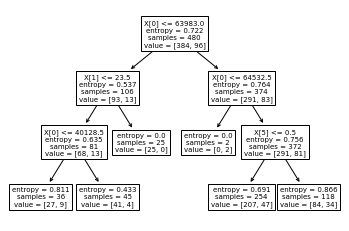

In [34]:
tree.plot_tree(model)

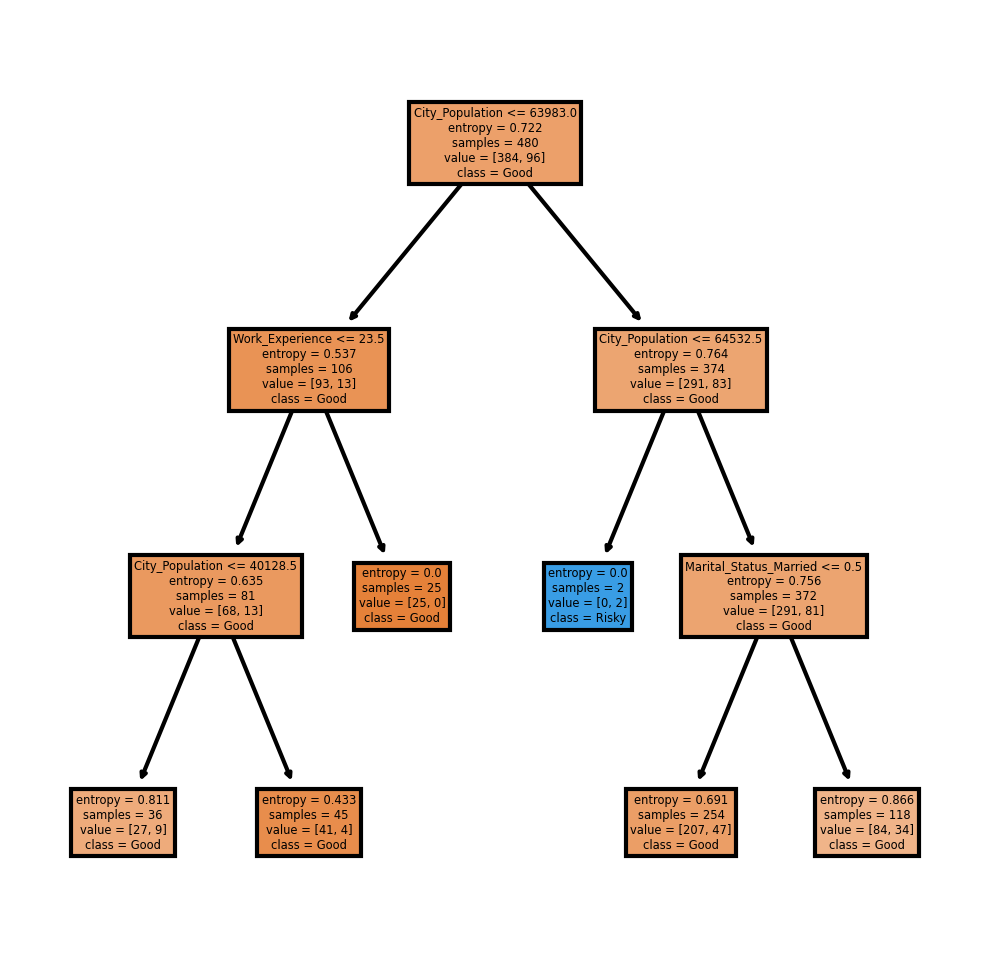

In [35]:
fn=['City_Population','Work_Experience','Undergrad_NO','Undergrad_YES','Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single','Urban_NO','Urban_YES']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [36]:
#Predicting on test data
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    120
dtype: int64

In [37]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0
income,
0,92
1,28


In [40]:
# Accuracy 
np.mean(preds==y_test)*100

76.66666666666667